# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved Euler-Cromer-metoden. Bli kjent med SciPy-biblioteket, og benytte en funksjon fra integrate pakken for å løse ODE. 

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte raskt med tiden. Vi må derfor forbedre vår numeriske metode for å få en fysisk løsning.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [114]:
# Husk å definere nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt
# Definer konstanter og initialbetingelser

m = 5           # mass, [kg]
l = 1.0         # length, [m]  
g = 9.8         # gravitational acceleration, [ms^-2]
theta_0 =  0.2  # intitial angle of cord with respect to the vertical, [rad]
omega_0 = 0.0   # initial angular velocity, [rads^-1]
T = 10.0        # [s]
# For å plotte i notebooken
%matplotlib inline

def euler_cromer_approx(theta_0, w_0, dt, T):
    
    n = int(T/dt)
    
    times = np.linspace(0,T,n)
    theta = np.zeros(n)
    w     = np.zeros(n)
    w[0]  = omega_0
    theta[0] = theta_0
    
    for i in range(len(times) - 1):
        w[i + 1] = w[i] - ((g/l)*theta[i])*dt      
        theta[i + 1] = theta[i] + w[i + 1]*dt

    return theta, w, T, times



**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b), og bytt ut  `euler_method` med `euler_cromer_approx`. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er konservert for en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

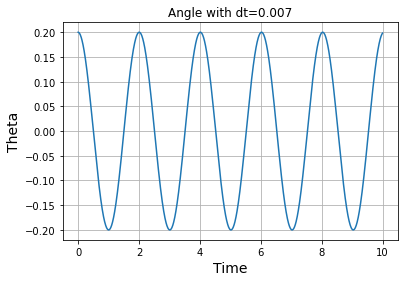

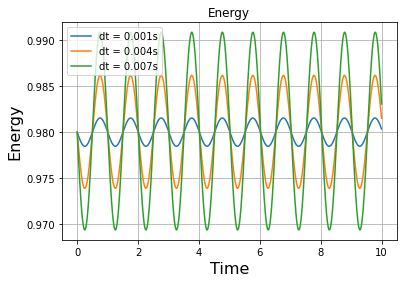

The difference in energy between first and last time in a period is 1.0459742755375423e-05.


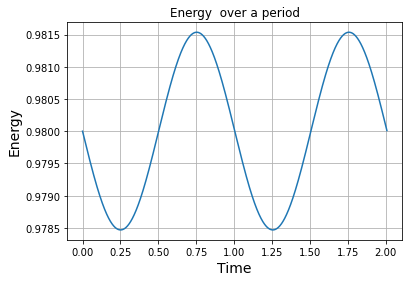

In [107]:
# SKRIV KODE HER
svar_1 = euler_cromer_approx(0.2, 0, 0.001, 10)
svar_2 = euler_cromer_approx(0.2, 0, 0.004, 10)
svar_3 = euler_cromer_approx(0.2, 0, 0.007, 10)

def energy_calculation(dt):
    svar = euler_cromer_approx(0.2, 0, dt, 10)
    n = int(T/dt)
    times = np.linspace(0, T, n)
    E = 0.5*m*l**2*svar[1]**2 + 0.5*m*g*l*svar[0]**2
    return E, times

plt.figure(4)
plt.plot(svar_3[3], svar_3[0])
plt.title("Angle with dt=0.007") 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Theta', fontsize=14)
plt.grid()
plt.show()

esvar_1 = energy_calculation(0.001)
esvar_2 = energy_calculation(0.004)
esvar_3 = energy_calculation(0.007)

plt.figure()
plt.plot(esvar_1[1], esvar_1[0], label = "dt = 0.001s")
plt.plot(esvar_2[1], esvar_2[0], label = "dt = 0.004s")
plt.plot(esvar_3[1], esvar_3[0], label = "dt = 0.007s")
plt.legend()
plt.title("Energy") 
plt.xlabel('Time', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.grid()
plt.show()
    
T_3 = 2*np.pi*np.sqrt(l/g)   
svar_3 = euler_cromer_approx(0.2, 0, 0.001, T_3)
times_3 = svar_3[3]
E_3 = 0.5*m*l**2*svar_3[1]**2 + 0.5*m*g*l*svar_3[0]**2
differanse = abs(E_3[0] - E_3[-1])
print(f"The difference in energy between first and last time in a period is {differanse}.")

plt.figure()
plt.plot(times_3, E_3, label = "dt = 0.001s")
plt.title("Energy  over a period") 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.grid()
plt.show()

**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
	\label{bevegelse}
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er viktig å merke seg at svært mangle ligninger man kommer fram til i fysikken ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med liten vinkel tilnærmelsen sammen med vinkelutslaget som beregner fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at liten vinkel tilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

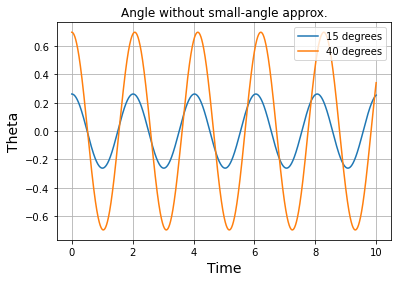

In [92]:
# SKRIV KODE HER
def euler_cromer_approx_1(theta_0, w_0, dt, T):
    n = int(T/dt)

    times = np.linspace(0, T, n)
    theta = np.zeros(n)
    w = np.zeros(n)
    w[0] = w_0
    theta[0] = theta_0

    for i in range(len(times) - 1):
        w[i + 1] = w[i] - ((g/l)*np.sin(theta[i]))*dt      
        theta[i + 1] = theta[i] + w[i + 1]*dt  
    return theta, w, T, times

svar_1_15 = euler_cromer_approx_1(np.radians(15), 0, 0.001, 10)
svar_1_40 = euler_cromer_approx_1(np.radians(40), 0, 0.001, 10)

plt.figure(4)
plt.plot(svar_1_15[3], svar_1_15[0], label = "15 degrees")
plt.plot(svar_1_40[3], svar_1_40[0], label = "40 degrees")
plt.title("Angle without small-angle approx.") 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Theta', fontsize=14)
plt.legend()
plt.grid()
plt.show()

##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så må man lese gjennom funksjons-dokumentasjonen, sånn at man skjønner hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Numeriske øvinger". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta [se programmeringsøving 3]) til å beregne usikkerheten til hvert steg. Steglengden justeres slik at ønsket usikkerhet blir oppnådd. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. Vi må derfor løse ett ligningssystem av *to* ODE-er. 

**a)** Lag en funksjon som tar inn en float `t`, og et array `vals`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmonsike pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 


In [78]:
def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    # SKRIV KODE HER
    dw = (-g/l) * np.sin(vals[0])
    dtheta = vals[1]

    
    return [dtheta, dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $t = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\omega_0 = 0.0$ rad/s. Bruk tidssteg $\Delta t = 0.01$.

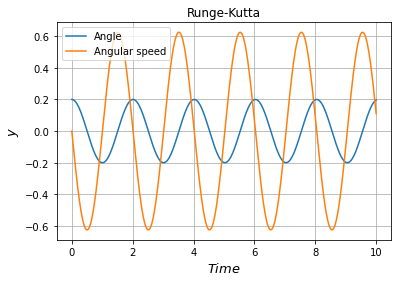

In [61]:
from scipy import integrate
def RK45_method(RHS, theta_0, w_0, t_1, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    t_1: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    Returns
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    
    # SKRIV KODE HER
    
    # Calculate y-values
    # RHS: Høyre side av differensialligningen
    # y_0: initialverdi for y
    # t_1: sluttid
    # dt: tidssteg
    init_values = [theta_0, w_0]   # Funksjonen tar inn en list eller numpy array som variabel
                                   # må derfor ha som array selv om det kun er en verdi her.
    t_span = [0, t_1+dt]           # Liste med start og sluttverdi
    t = np.arange(0, t_1 + dt, dt) # Array med verdier fra 0 til t_1, med dt som steglengde mellom verdier
    solution = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', t_eval = t) 
    w = solution.y[1, :]
    theta = solution.y[0, :]       # Array(y-values)
    t = solution.t                 # Array(t-values)
    return theta, w, t

# Parameters
t_0 = 0          # initial time value, [s]
t_1 = 10         # final time value, [s]
dt = 0.01        # time-step, [s]
theta_0 = 0.2    # initial angle,  [rad]
w_0 = 0.0        # initial angular speed, [s^-1]

theta, w, t = RK45_method(equation, theta_0, w_0, t_1, dt)


# PLOT Angle

plt.plot(t, theta, label = "Angle")        # y-values plotted as a function of time. 
plt.plot(t, w, label = "Angular speed")
plt.xlabel('$Time$', fontsize = 13)          
plt.ylabel('$y$', fontsize = 13)           
plt.title("Runge-Kutta")
plt.legend()
plt.grid()
plt.show()                                 # Plotting 

